# Decistion tree modelling

In this notebook we are going to create decision tree models on our datasets. 

## Libraries

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

## Decision tree on the full size dataset 

### Loading and splitting the data 

In [7]:
df_full_size = pd.read_csv('../data/pre-processed-data/data-full-size.csv')
df_full_size.head()

,Unnamed: 0,id,Gender,Age,Driving_License,Previously_Insured,Vehicle_Damage,Annual_Premium,Vintage,Response,...,Policy_Sales_Channel_155,Policy_Sales_Channel_156,Policy_Sales_Channel_157,Policy_Sales_Channel_158,Policy_Sales_Channel_159,Policy_Sales_Channel_160,Policy_Sales_Channel_163,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years
0,0,1,1,44,1,0,1,40454.0,217,1,...,0,0,0,0,0,0,0,0,0,1
1,1,2,1,76,1,0,0,33536.0,183,0,...,0,0,0,0,0,0,0,1,0,0
2,2,3,1,47,1,0,1,38294.0,27,1,...,0,0,0,0,0,0,0,0,0,1
3,3,4,1,21,1,1,0,28619.0,203,0,...,0,0,0,0,0,0,0,0,1,0
4,4,5,0,29,1,1,0,27496.0,39,0,...,0,0,0,0,0,0,0,0,1,0


In [8]:
df_full_size = df_full_size.iloc[:,2:]
df_full_size.head()

,Gender,Age,Driving_License,Previously_Insured,Vehicle_Damage,Annual_Premium,Vintage,Response,Region_Code_0,Region_Code_1,...,Policy_Sales_Channel_155,Policy_Sales_Channel_156,Policy_Sales_Channel_157,Policy_Sales_Channel_158,Policy_Sales_Channel_159,Policy_Sales_Channel_160,Policy_Sales_Channel_163,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years
0,1,44,1,0,1,40454.0,217,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,76,1,0,0,33536.0,183,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,47,1,0,1,38294.0,27,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,21,1,1,0,28619.0,203,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,29,1,1,0,27496.0,39,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [9]:
df_full_size['Response'].value_counts()

0    334399
1     46710
Name: Response, dtype: int64

In [10]:
X = df_full_size.drop('Response', axis = 1)
y = df_full_size['Response']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 12)

In [13]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(285831, 218)
(285831,)
(95278, 218)
(95278,)


### Creating and tuning the model

In [15]:
tree = DecisionTreeClassifier(random_state = 12)
tree.fit(X_train, y_train)

With our initial decision tree model we are able to get a test score of 82.82499632653918%


In [19]:
print('With our initial decision tree model we are able to get a test score of {:.14%}'.format(tree.score(X_test, y_test)))
print('Our train score is {:.14%}'.format(tree.score(X_train, y_train)))

With our initial decision tree model we are able to get a test score of 82.82499632653918%
Our train score is 99.99055385874870%


Now we will try to tune our model by creating some different ones. We will try to create one with class_weight = 'balanced' and one without.

In [54]:
def tree_trials(X_train, X_test, y_train, y_test, random_state_list, max_features_list, max_depth_list, class_weight = None):
    scores_dict = {'Train Score': [], 'Test Score': [], 'Random_state': [], 'max_features': [], 'max_depth': []}

    for i in range(len(random_state_list)):
        model = DecisionTreeClassifier(random_state=random_state_list[i], max_features=max_features_list[i]\
            , max_depth=max_depth_list[i], class_weight=class_weight)
        model.fit(X_train, y_train)
        scores_dict['Train Score'].append(model.score(X_train, y_train))
        scores_dict['Test Score'].append(model.score(X_test, y_test))
        scores_dict['Random_state'].append(random_state_list[i])
        scores_dict['max_features'].append(max_features_list[i])
        scores_dict['max_depth'].append(max_depth_list[i])
    
    return scores_dict

In [55]:
random_state_list = [2, 5, 25, 100, 455, 700]
max_features_list = [15, 45, 100, 150, 200, 218]
max_depth_list = [2, 7, 25, 70, 100, 250]

In [56]:
results_tree = tree_trials(X_train, X_test, y_train, y_test, random_state_list, max_features_list, max_depth_list)

In [57]:
results_tree

{'Train Score': [0.8771336908872726,
  0.8771896680206136,
  0.9145893902340894,
  0.9979323446372157,
  0.999905538587487,
  0.999905538587487],
 'Test Score': [0.8783454732467096,
  0.8782300216209408,
  0.8616364743172611,
  0.8281974852536788,
  0.8262662944226369,
  0.8269485085749071],
 'Random_state': [2, 5, 25, 100, 455, 700],
 'max_features': [15, 45, 100, 150, 200, 218],
 'max_depth': [2, 7, 25, 70, 100, 250]}

In [58]:
results_tree_balanced = tree_trials(X_train, X_test, y_train, y_test, random_state_list, max_features_list, max_depth_list, class_weight='balanced')

In [59]:
results_tree_balanced

{'Train Score': [0.6125227844425553,
  0.6658235110957174,
  0.7860763877955855,
  0.9801945905097768,
  0.9991778358540536,
  0.999905538587487],
 'Test Score': [0.6125653351245828,
  0.6653687105102962,
  0.7413148890614832,
  0.8177858477298012,
  0.8249963265391801,
  0.8230126576964252],
 'Random_state': [2, 5, 25, 100, 455, 700],
 'max_features': [15, 45, 100, 150, 200, 218],
 'max_depth': [2, 7, 25, 70, 100, 250]}

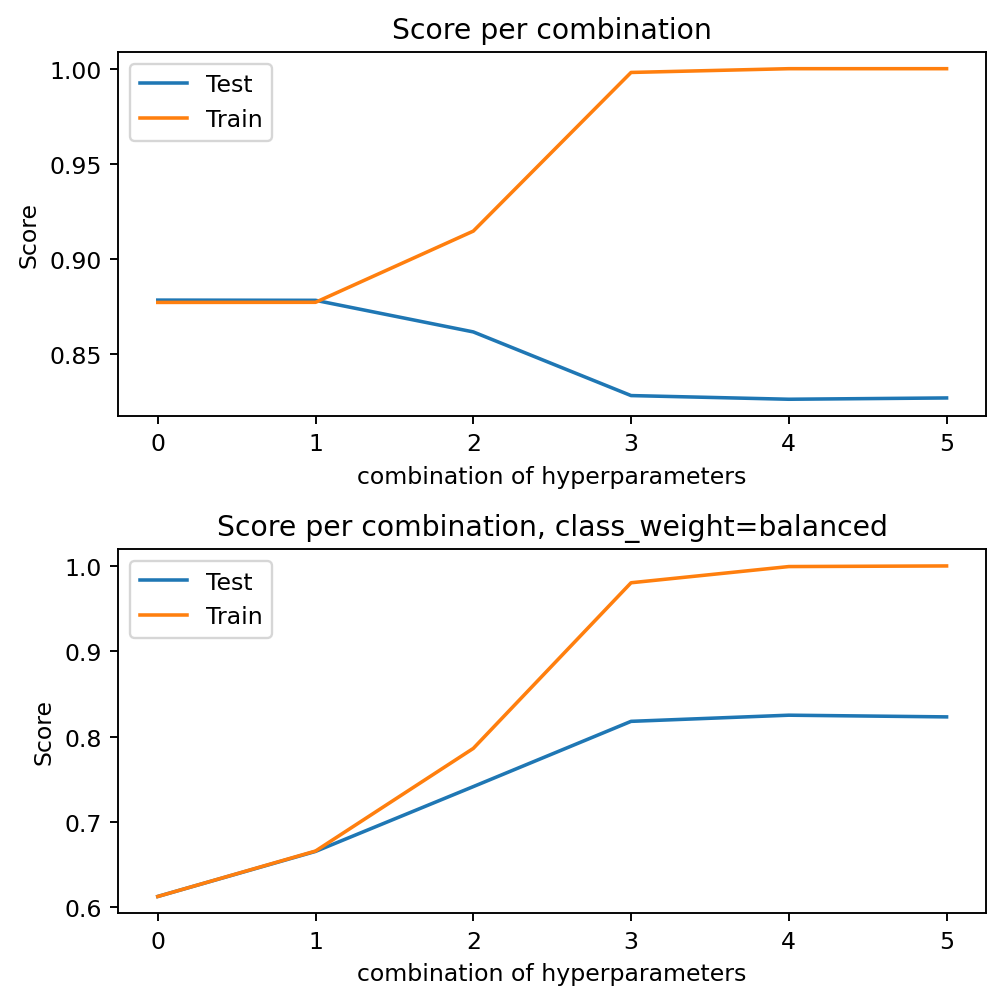

In [74]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize = (6,6), dpi = 170)
ax[0].plot(range(len(random_state_list)), results_tree['Test Score'], label = 'Test')
ax[0].plot(range(len(random_state_list)), results_tree['Train Score'], label = 'Train')
#ax[0].set_xticks(range(len(random_state_list)))
#ax[0].set_xticklabels(random_state_list)
ax[0].legend()
ax[0].set(xlabel = 'combination of hyperparameters', ylabel = 'Score', title = 'Score per combination')

ax[1].plot(range(len(random_state_list)), results_tree_balanced['Test Score'], label = 'Test')
ax[1].plot(range(len(random_state_list)), results_tree_balanced['Train Score'], label = 'Train')
#ax[1].set_xticks(range(len(random_state_list)))
#ax[1].set_xticklabels(random_state_list)
ax[1].legend()
ax[1].set(xlabel = 'combination of hyperparameters', ylabel = 'Score', title = 'Score per combination, class_weight=balanced')

plt.tight_layout()
plt.show()

In [110]:
def find_best_combo(max_depth_list, max_features_list, random_state_list, test_scores):
    max_test_score = max(test_scores)
    max_test_score_idx = np.argmax(test_scores)
    best_max_depth = max_depth_list[max_test_score_idx]
    best_max_features = max_features_list[max_test_score_idx]
    best_random_state = random_state_list[max_test_score_idx]
    optimal_parameters = {'random_state': best_random_state, 'max_features': best_max_features, 'max_depth': best_max_depth}
    
    return optimal_parameters

In [111]:
find_best_combo(max_depth_list, max_features_list, random_state_list, results_tree['Test Score'])

{'random_state': 2, 'max_features': 15, 'max_depth': 2}

In [112]:
find_best_combo(max_depth_list, max_features_list, random_state_list, results_tree_balanced['Test Score'])

{'random_state': 455, 'max_features': 200, 'max_depth': 100}

### Evaluating the models

#### Model without class_weight = 'balanced'

In [115]:
tree_model = DecisionTreeClassifier(random_state=2, max_features=15, max_depth=2)
tree_model.fit(X_train, y_train)

print('With our optimal tree model without balanced parameter the highest test score is {:.14%}'.format(tree_model.score(X_test, y_test)))

With our optimal tree model without balanced parameter the highest test score is 87.83454732467096%


In [118]:
sorted(list(zip(X.columns, tree_model.feature_importances_)), key=lambda x: x[1], reverse = True)[:10]

[('Vehicle_Damage', 0.8961980791587086),
 ('Vehicle_Age_< 1 Year', 0.10379405666533942),
 ('Region_Code_14', 7.864175951975993e-06),
 ('Gender', 0.0),
 ('Age', 0.0),
 ('Driving_License', 0.0),
 ('Previously_Insured', 0.0),
 ('Annual_Premium', 0.0),
 ('Vintage', 0.0),
 ('Region_Code_0', 0.0)]

In [119]:
sorted(list(zip(X.columns, tree_model.feature_importances_)), key=lambda x: x[1], reverse = True)[-10:]

[('Policy_Sales_Channel_154', 0.0),
 ('Policy_Sales_Channel_155', 0.0),
 ('Policy_Sales_Channel_156', 0.0),
 ('Policy_Sales_Channel_157', 0.0),
 ('Policy_Sales_Channel_158', 0.0),
 ('Policy_Sales_Channel_159', 0.0),
 ('Policy_Sales_Channel_160', 0.0),
 ('Policy_Sales_Channel_163', 0.0),
 ('Vehicle_Age_1-2 Year', 0.0),
 ('Vehicle_Age_> 2 Years', 0.0)]

In [120]:
confusion_matrix(y_test, tree_model.predict(X_test))

array([[83687,     0],
       [11591,     0]])

In [121]:
print(classification_report(y_test, tree_model.predict(X_test), target_names=['Not interested', 'Interested']))

                precision    recall  f1-score   support

Not interested       0.88      1.00      0.94     83687
    Interested       0.00      0.00      0.00     11591

      accuracy                           0.88     95278
     macro avg       0.44      0.50      0.47     95278
  weighted avg       0.77      0.88      0.82     95278



/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Model with class_weight = 'balanced'

In [122]:
tree_model_balanced = DecisionTreeClassifier(random_state=455, max_features=200, max_depth=100)
tree_model_balanced.fit(X_train, y_train)

print('With our optimal tree model with the balanced parameter the highest test score is {:.14%}'.format(tree_model_balanced.score(X_test, y_test)))

With our optimal tree model with the balanced parameter the highest test score is 82.62662944226369%


In [123]:
sorted(list(zip(X.columns, tree_model_balanced.feature_importances_)), key=lambda x: x[1], reverse = True)[:10]

[('Annual_Premium', 0.24787324607278574),
 ('Vintage', 0.2459464898578294),
 ('Age', 0.1304725092069405),
 ('Vehicle_Damage', 0.1260710801534834),
 ('Gender', 0.02464984987190774),
 ('Previously_Insured', 0.012139183280317808),
 ('Policy_Sales_Channel_124', 0.009264191859805676),
 ('Region_Code_28', 0.009105456999716145),
 ('Region_Code_8', 0.008912122700645163),
 ('Vehicle_Age_1-2 Year', 0.007148197118861322)]

In [124]:
sorted(list(zip(X.columns, tree_model_balanced.feature_importances_)), key=lambda x: x[1], reverse = True)[-10:]

[('Policy_Sales_Channel_115', 0.0),
 ('Policy_Sales_Channel_117', 0.0),
 ('Policy_Sales_Channel_118', 0.0),
 ('Policy_Sales_Channel_126', 0.0),
 ('Policy_Sales_Channel_134', 0.0),
 ('Policy_Sales_Channel_137', 0.0),
 ('Policy_Sales_Channel_143', 0.0),
 ('Policy_Sales_Channel_144', 0.0),
 ('Policy_Sales_Channel_146', 0.0),
 ('Policy_Sales_Channel_149', 0.0)]

In [125]:
confusion_matrix(y_test, tree_model_balanced.predict(X_test))

array([[75238,  8449],
       [ 8104,  3487]])

In [126]:
print(classification_report(y_test, tree_model_balanced.predict(X_test), target_names=['Not interested', 'Interested']))

                precision    recall  f1-score   support

Not interested       0.90      0.90      0.90     83687
    Interested       0.29      0.30      0.30     11591

      accuracy                           0.83     95278
     macro avg       0.60      0.60      0.60     95278
  weighted avg       0.83      0.83      0.83     95278



In [151]:
features_important = sorted(list(zip(X.columns, tree_model_balanced.feature_importances_)), key=lambda x: x[1], reverse = True)

In [152]:
features_important_name_list = []
features_important_list = []
for i in features_important[:20]:
    for j in i:
        if type(j) == str:
            features_important_name_list.append(j)
        elif isinstance(j, float):
            features_important_list.append(j)
        

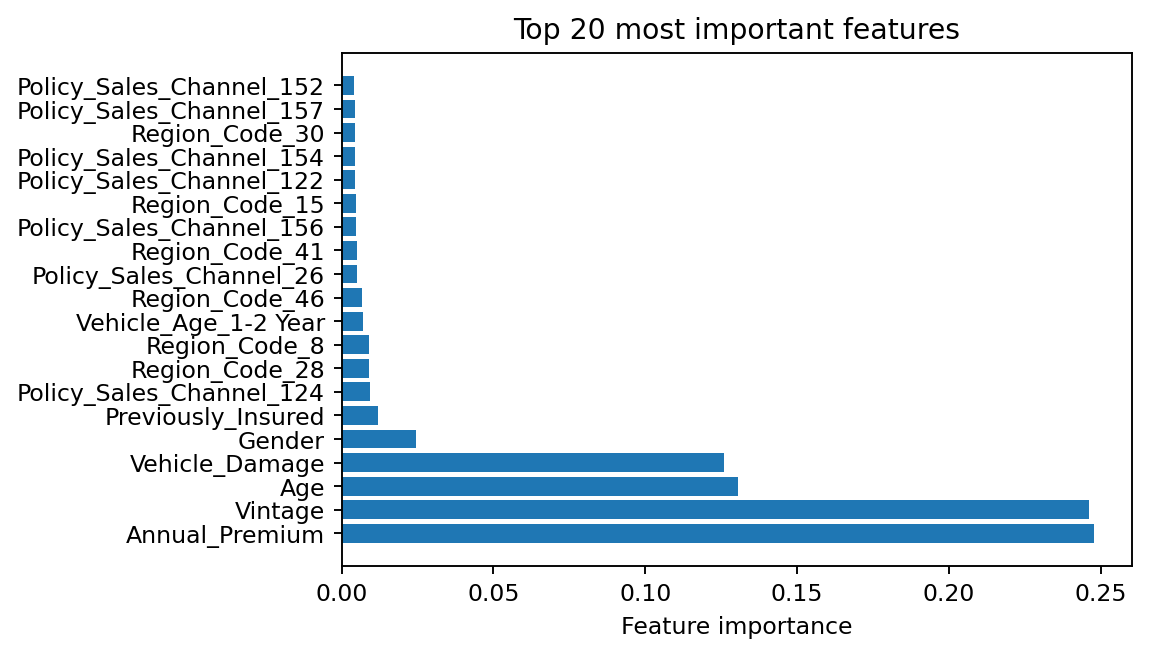

In [155]:
fig, ax = plt.subplots(figsize = (6,4), dpi = 170)
ax.barh(features_important_name_list, features_important_list)
ax.set(xlabel = 'Feature importance', title = 'Top 20 most important features')
plt.show()